In [2]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', None)

#text pre-porcessing
#!pip install nltk
import nltk
#nltk.download()
from nltk.corpus import stopwords 
from textblob import Word


#visualization
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from collections import Counter


#creating plots
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import FreqDist


#get labels and emotions
from textblob import TextBlob
from transformers import pipeline


In [3]:
df = pd.read_csv('data/news.csv', sep=';', encoding='utf-8-sig')
df= df[['newspaper','date','abstract']]
df

,newspaper,date,abstract
0,Mail Online,2022-12-31,the new year is likely to bring more challenges to the tech sector.
1,Mail Online,2022-12-29,worldwide shipments of virtual and augmented reality headsets dropped 12 to 9.6 million this year a problem for meta and other tech companies that are invested in the digital worlds' potential.
2,Mail Online,2022-12-29,"the year ahead brings new guard rails for crypto but not the blockchain technology that underpins it and other financial wizardry.""australia punches above"
3,Mail Online,2022-12-29,the fortunes of silicon valley billionaires took a beating in 2022 as share prices of the world's tech giants plummeted.here are some of the worst hit by
4,Mail Online,2022-12-29,mailonline takes a look at the science behind why sticking on a virtual reality headset like oculus quest or htc vive can improve your workout.
...,...,...,...
4116,CNBC,2021-03-11,Gaming company Roblox went public Wednesday and ended its first trading session with an eyepopping $38 billion market cap.It's natural to wonder why a moneylosing company that makes video games for an audience of mostly children and teens attracted such a lofty valuation. Although its impressive
4117,CNBC,2021-03-10,Neil Rimer recalls having early conversations about what became Roblox when he was studying at Stanford in the 1980s. He was college buddies with David Baszucki the gaming company's founder and CEO.More than three decades later that idea has made Baszucki extremely rich his Roblox stake is worth
4118,CNBC,2021-03-03,LONDON Fortnite developer Epic Games has acquired Tonic Games Group the British studio behind smash hit video game Fall Guys.Fall Guys became an instant hit when it launched last summer attracting millions of players within a month of its release. The game sees up to 60 people play as jelly bean
4119,CNBC,2021-03-01,In October 2020 Miamibased art collector Pablo RodriguezFraile spent almost $67000 on a 10second video artwork that he could have watched for free online. Last week he sold it for $6.6 million.The video by digital artist Beeple whose real name is Mike Winkelmann was authenticated by blockcha


In [4]:
df['date']=pd.to_datetime(df.date, format='%Y-%m-%d')

In [5]:
df

,newspaper,date,abstract
0,Mail Online,2022-12-31,the new year is likely to bring more challenges to the tech sector.
1,Mail Online,2022-12-29,worldwide shipments of virtual and augmented reality headsets dropped 12 to 9.6 million this year a problem for meta and other tech companies that are invested in the digital worlds' potential.
2,Mail Online,2022-12-29,"the year ahead brings new guard rails for crypto but not the blockchain technology that underpins it and other financial wizardry.""australia punches above"
3,Mail Online,2022-12-29,the fortunes of silicon valley billionaires took a beating in 2022 as share prices of the world's tech giants plummeted.here are some of the worst hit by
4,Mail Online,2022-12-29,mailonline takes a look at the science behind why sticking on a virtual reality headset like oculus quest or htc vive can improve your workout.
...,...,...,...
4116,CNBC,2021-03-11,Gaming company Roblox went public Wednesday and ended its first trading session with an eyepopping $38 billion market cap.It's natural to wonder why a moneylosing company that makes video games for an audience of mostly children and teens attracted such a lofty valuation. Although its impressive
4117,CNBC,2021-03-10,Neil Rimer recalls having early conversations about what became Roblox when he was studying at Stanford in the 1980s. He was college buddies with David Baszucki the gaming company's founder and CEO.More than three decades later that idea has made Baszucki extremely rich his Roblox stake is worth
4118,CNBC,2021-03-03,LONDON Fortnite developer Epic Games has acquired Tonic Games Group the British studio behind smash hit video game Fall Guys.Fall Guys became an instant hit when it launched last summer attracting millions of players within a month of its release. The game sees up to 60 people play as jelly bean
4119,CNBC,2021-03-01,In October 2020 Miamibased art collector Pablo RodriguezFraile spent almost $67000 on a 10second video artwork that he could have watched for free online. Last week he sold it for $6.6 million.The video by digital artist Beeple whose real name is Mike Winkelmann was authenticated by blockcha


In [6]:
#df['title']=df["title"].values.astype('str')
df['abstract']=df["abstract"].values.astype('str')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4121 entries, 0 to 4120
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   newspaper  4121 non-null   object        
 1   date       4121 non-null   datetime64[ns]
 2   abstract   4121 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 96.7+ KB


Converting Text Data to Lowercase

In [8]:
#df['title']=df['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['abstract_cleaning']=df['abstract'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [9]:
df

,newspaper,date,abstract,abstract_cleaning
0,Mail Online,2022-12-31,the new year is likely to bring more challenges to the tech sector.,the new year is likely to bring more challenges to the tech sector.
1,Mail Online,2022-12-29,worldwide shipments of virtual and augmented reality headsets dropped 12 to 9.6 million this year a problem for meta and other tech companies that are invested in the digital worlds' potential.,worldwide shipments of virtual and augmented reality headsets dropped 12 to 9.6 million this year a problem for meta and other tech companies that are invested in the digital worlds' potential.
2,Mail Online,2022-12-29,"the year ahead brings new guard rails for crypto but not the blockchain technology that underpins it and other financial wizardry.""australia punches above","the year ahead brings new guard rails for crypto but not the blockchain technology that underpins it and other financial wizardry.""australia punches above"
3,Mail Online,2022-12-29,the fortunes of silicon valley billionaires took a beating in 2022 as share prices of the world's tech giants plummeted.here are some of the worst hit by,the fortunes of silicon valley billionaires took a beating in 2022 as share prices of the world's tech giants plummeted.here are some of the worst hit by
4,Mail Online,2022-12-29,mailonline takes a look at the science behind why sticking on a virtual reality headset like oculus quest or htc vive can improve your workout.,mailonline takes a look at the science behind why sticking on a virtual reality headset like oculus quest or htc vive can improve your workout.
...,...,...,...,...
4116,CNBC,2021-03-11,Gaming company Roblox went public Wednesday and ended its first trading session with an eyepopping $38 billion market cap.It's natural to wonder why a moneylosing company that makes video games for an audience of mostly children and teens attracted such a lofty valuation. Although its impressive,gaming company roblox went public wednesday and ended its first trading session with an eyepopping $38 billion market cap.it's natural to wonder why a moneylosing company that makes video games for an audience of mostly children and teens attracted such a lofty valuation. although its impressive
4117,CNBC,2021-03-10,Neil Rimer recalls having early conversations about what became Roblox when he was studying at Stanford in the 1980s. He was college buddies with David Baszucki the gaming company's founder and CEO.More than three decades later that idea has made Baszucki extremely rich his Roblox stake is worth,neil rimer recalls having early conversations about what became roblox when he was studying at stanford in the 1980s. he was college buddies with david baszucki the gaming company's founder and ceo.more than three decades later that idea has made baszucki extremely rich his roblox stake is worth
4118,CNBC,2021-03-03,LONDON Fortnite developer Epic Games has acquired Tonic Games Group the British studio behind smash hit video game Fall Guys.Fall Guys became an instant hit when it launched last summer attracting millions of players within a month of its release. The game sees up to 60 people play as jelly bean,london fortnite developer epic games has acquired tonic games group the british studio behind smash hit video game fall guys.fall guys became an instant hit when it launched last summer attracting millions of players within a month of its release. the game sees up to 60 people play as jelly bean
4119,CNBC,2021-03-01,In October 2020 Miamibased art collector Pablo RodriguezFraile spent almost $67000 on a 10second video artwork that he could have watched for free online. Last week he sold it for $6.6 million.The video by digital artist Beeple whose real name is Mike Winkelmann was authenticated by blockcha,in october 2020 miamibased art collector pablo rodriguezfraile spent almost $67000 on a 10second video artwork that he could have watched for free online. last week he sold it for $6.6 million.the video by digital art

contraction reformation

In [10]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'll": "he will",
"he's": "he is",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"o'clock": "of the clock",
"oughtn't": "ought not",
"shan't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there's": "there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"will've": "will have",
"won't": "will not",
"would've": "would have",
"wouldn't": "would not",
"y'all": "you all",
"you'd": "you would",
"you'll": "you will",
"you're": "you are",
"you've": "you have"
}

In [11]:
def replace_negations(words):
    sentence=[]
    for word in words:
        if word in contractions.keys():
            sentence.append(contractions[word])
        else:
            sentence.append(word)
    return " ".join(sentence)


In [12]:
#df['title'] = df.apply(lambda row: replace_negations(row['title'].split()),axis=1)
df['abstract_cleaning'] = df.apply(lambda row: replace_negations(row['abstract_cleaning'].split()),axis=1)



In [13]:
df.head(10)

,newspaper,date,abstract,abstract_cleaning
0,Mail Online,2022-12-31,the new year is likely to bring more challenges to the tech sector.,the new year is likely to bring more challenges to the tech sector.
1,Mail Online,2022-12-29,worldwide shipments of virtual and augmented reality headsets dropped 12 to 9.6 million this year a problem for meta and other tech companies that are invested in the digital worlds' potential.,worldwide shipments of virtual and augmented reality headsets dropped 12 to 9.6 million this year a problem for meta and other tech companies that are invested in the digital worlds' potential.
2,Mail Online,2022-12-29,"the year ahead brings new guard rails for crypto but not the blockchain technology that underpins it and other financial wizardry.""australia punches above","the year ahead brings new guard rails for crypto but not the blockchain technology that underpins it and other financial wizardry.""australia punches above"
3,Mail Online,2022-12-29,the fortunes of silicon valley billionaires took a beating in 2022 as share prices of the world's tech giants plummeted.here are some of the worst hit by,the fortunes of silicon valley billionaires took a beating in 2022 as share prices of the world's tech giants plummeted.here are some of the worst hit by
4,Mail Online,2022-12-29,mailonline takes a look at the science behind why sticking on a virtual reality headset like oculus quest or htc vive can improve your workout.,mailonline takes a look at the science behind why sticking on a virtual reality headset like oculus quest or htc vive can improve your workout.
5,Mail Online,2022-12-23,2022 has been a turbulent year in the tech sector.,2022 has been a turbulent year in the tech sector.
6,Mail Online,2022-12-20,meta platforms inc boss mark zuckerberg defended his acquisition of a virtual reality fitness app to an,meta platforms inc boss mark zuckerberg defended his acquisition of a virtual reality fitness app to an
7,Mail Online,2022-12-20,meta is still making a push into building the metaverse committing to devote 20 of its costs to the effort at reality labs despite its stock price dropping 60 and a top executive departing.,meta is still making a push into building the metaverse committing to devote 20 of its costs to the effort at reality labs despite its stock price dropping 60 and a top executive departing.
8,Mail Online,2022-12-19,"""call of duty"" maker activision blizzard's chief operating officer daniel alegre will join ""bored ape"" nft maker yuga labs as its chief","""call of duty"" maker activision blizzard's chief operating officer daniel alegre will join ""bored ape"" nft maker yuga labs as its chief"
9,Mail Online,2022-12-17,a prominent video game creator who helped lead facebook's expansion into virtual reality has resigned from the social networking,a prominent video game creator who helped lead facebook's expansion into virtual reality has resigned from the social networking


Removing punctuation

In [14]:
#df['title'] = df['title'].str.replace('[^\w\s]'," ")
df['abstract_cleaning'] = df['abstract_cleaning'].str.replace('[^\w\s]'," ")
df

,newspaper,date,abstract,abstract_cleaning
0,Mail Online,2022-12-31,the new year is likely to bring more challenges to the tech sector.,the new year is likely to bring more challenges to the tech sector
1,Mail Online,2022-12-29,worldwide shipments of virtual and augmented reality headsets dropped 12 to 9.6 million this year a problem for meta and other tech companies that are invested in the digital worlds' potential.,worldwide shipments of virtual and augmented reality headsets dropped 12 to 9 6 million this year a problem for meta and other tech companies that are invested in the digital worlds potential
2,Mail Online,2022-12-29,"the year ahead brings new guard rails for crypto but not the blockchain technology that underpins it and other financial wizardry.""australia punches above",the year ahead brings new guard rails for crypto but not the blockchain technology that underpins it and other financial wizardry australia punches above
3,Mail Online,2022-12-29,the fortunes of silicon valley billionaires took a beating in 2022 as share prices of the world's tech giants plummeted.here are some of the worst hit by,the fortunes of silicon valley billionaires took a beating in 2022 as share prices of the world s tech giants plummeted here are some of the worst hit by
4,Mail Online,2022-12-29,mailonline takes a look at the science behind why sticking on a virtual reality headset like oculus quest or htc vive can improve your workout.,mailonline takes a look at the science behind why sticking on a virtual reality headset like oculus quest or htc vive can improve your workout
...,...,...,...,...
4116,CNBC,2021-03-11,Gaming company Roblox went public Wednesday and ended its first trading session with an eyepopping $38 billion market cap.It's natural to wonder why a moneylosing company that makes video games for an audience of mostly children and teens attracted such a lofty valuation. Although its impressive,gaming company roblox went public wednesday and ended its first trading session with an eyepopping 38 billion market cap it s natural to wonder why a moneylosing company that makes video games for an audience of mostly children and teens attracted such a lofty valuation although its impressive
4117,CNBC,2021-03-10,Neil Rimer recalls having early conversations about what became Roblox when he was studying at Stanford in the 1980s. He was college buddies with David Baszucki the gaming company's founder and CEO.More than three decades later that idea has made Baszucki extremely rich his Roblox stake is worth,neil rimer recalls having early conversations about what became roblox when he was studying at stanford in the 1980s he was college buddies with david baszucki the gaming company s founder and ceo more than three decades later that idea has made baszucki extremely rich his roblox stake is worth
4118,CNBC,2021-03-03,LONDON Fortnite developer Epic Games has acquired Tonic Games Group the British studio behind smash hit video game Fall Guys.Fall Guys became an instant hit when it launched last summer attracting millions of players within a month of its release. The game sees up to 60 people play as jelly bean,london fortnite developer epic games has acquired tonic games group the british studio behind smash hit video game fall guys fall guys became an instant hit when it launched last summer attracting millions of players within a month of its release the game sees up to 60 people play as jelly bean
4119,CNBC,2021-03-01,In October 2020 Miamibased art collector Pablo RodriguezFraile spent almost $67000 on a 10second video artwork that he could have watched for free online. Last week he sold it for $6.6 million.The video by digital artist Beeple whose real name is Mike Winkelmann was authenticated by blockcha,in october 2020 miamibased art collector pablo rodriguezfraile spent almost 67000 on a 10second video artwork that he could have watched for free online last week he sold it for 6 6 million the video by digital artist beeple whos

Removing numerical values

In [15]:
#df['title'] = df['title'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
df['abstract_cleaning'] = df['abstract_cleaning'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
df

,newspaper,date,abstract,abstract_cleaning
0,Mail Online,2022-12-31,the new year is likely to bring more challenges to the tech sector.,the new year is likely to bring more challenges to the tech sector
1,Mail Online,2022-12-29,worldwide shipments of virtual and augmented reality headsets dropped 12 to 9.6 million this year a problem for meta and other tech companies that are invested in the digital worlds' potential.,worldwide shipments of virtual and augmented reality headsets dropped to million this year a problem for meta and other tech companies that are invested in the digital worlds potential
2,Mail Online,2022-12-29,"the year ahead brings new guard rails for crypto but not the blockchain technology that underpins it and other financial wizardry.""australia punches above",the year ahead brings new guard rails for crypto but not the blockchain technology that underpins it and other financial wizardry australia punches above
3,Mail Online,2022-12-29,the fortunes of silicon valley billionaires took a beating in 2022 as share prices of the world's tech giants plummeted.here are some of the worst hit by,the fortunes of silicon valley billionaires took a beating in as share prices of the world s tech giants plummeted here are some of the worst hit by
4,Mail Online,2022-12-29,mailonline takes a look at the science behind why sticking on a virtual reality headset like oculus quest or htc vive can improve your workout.,mailonline takes a look at the science behind why sticking on a virtual reality headset like oculus quest or htc vive can improve your workout
...,...,...,...,...
4116,CNBC,2021-03-11,Gaming company Roblox went public Wednesday and ended its first trading session with an eyepopping $38 billion market cap.It's natural to wonder why a moneylosing company that makes video games for an audience of mostly children and teens attracted such a lofty valuation. Although its impressive,gaming company roblox went public wednesday and ended its first trading session with an eyepopping billion market cap it s natural to wonder why a moneylosing company that makes video games for an audience of mostly children and teens attracted such a lofty valuation although its impressive
4117,CNBC,2021-03-10,Neil Rimer recalls having early conversations about what became Roblox when he was studying at Stanford in the 1980s. He was college buddies with David Baszucki the gaming company's founder and CEO.More than three decades later that idea has made Baszucki extremely rich his Roblox stake is worth,neil rimer recalls having early conversations about what became roblox when he was studying at stanford in the s he was college buddies with david baszucki the gaming company s founder and ceo more than three decades later that idea has made baszucki extremely rich his roblox stake is worth
4118,CNBC,2021-03-03,LONDON Fortnite developer Epic Games has acquired Tonic Games Group the British studio behind smash hit video game Fall Guys.Fall Guys became an instant hit when it launched last summer attracting millions of players within a month of its release. The game sees up to 60 people play as jelly bean,london fortnite developer epic games has acquired tonic games group the british studio behind smash hit video game fall guys fall guys became an instant hit when it launched last summer attracting millions of players within a month of its release the game sees up to people play as jelly bean
4119,CNBC,2021-03-01,In October 2020 Miamibased art collector Pablo RodriguezFraile spent almost $67000 on a 10second video artwork that he could have watched for free online. Last week he sold it for $6.6 million.The video by digital artist Beeple whose real name is Mike Winkelmann was authenticated by blockcha,in october miamibased art collector pablo rodriguezfraile spent almost on a second video artwork that he could have watched for free online last week he sold it for million the video by digital artist beeple whose real name is mike winkelmann was auth

Lemmatizing

In [16]:
#df['title'] = df['title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['abstract_cleaning'] = df['abstract_cleaning'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df

,newspaper,date,abstract,abstract_cleaning
0,Mail Online,2022-12-31,the new year is likely to bring more challenges to the tech sector.,the new year is likely to bring more challenge to the tech sector
1,Mail Online,2022-12-29,worldwide shipments of virtual and augmented reality headsets dropped 12 to 9.6 million this year a problem for meta and other tech companies that are invested in the digital worlds' potential.,worldwide shipment of virtual and augmented reality headset dropped to million this year a problem for meta and other tech company that are invested in the digital world potential
2,Mail Online,2022-12-29,"the year ahead brings new guard rails for crypto but not the blockchain technology that underpins it and other financial wizardry.""australia punches above",the year ahead brings new guard rail for crypto but not the blockchain technology that underpins it and other financial wizardry australia punch above
3,Mail Online,2022-12-29,the fortunes of silicon valley billionaires took a beating in 2022 as share prices of the world's tech giants plummeted.here are some of the worst hit by,the fortune of silicon valley billionaire took a beating in a share price of the world s tech giant plummeted here are some of the worst hit by
4,Mail Online,2022-12-29,mailonline takes a look at the science behind why sticking on a virtual reality headset like oculus quest or htc vive can improve your workout.,mailonline take a look at the science behind why sticking on a virtual reality headset like oculus quest or htc vive can improve your workout
...,...,...,...,...
4116,CNBC,2021-03-11,Gaming company Roblox went public Wednesday and ended its first trading session with an eyepopping $38 billion market cap.It's natural to wonder why a moneylosing company that makes video games for an audience of mostly children and teens attracted such a lofty valuation. Although its impressive,gaming company roblox went public wednesday and ended it first trading session with an eyepopping billion market cap it s natural to wonder why a moneylosing company that make video game for an audience of mostly child and teen attracted such a lofty valuation although it impressive
4117,CNBC,2021-03-10,Neil Rimer recalls having early conversations about what became Roblox when he was studying at Stanford in the 1980s. He was college buddies with David Baszucki the gaming company's founder and CEO.More than three decades later that idea has made Baszucki extremely rich his Roblox stake is worth,neil rimer recall having early conversation about what became roblox when he wa studying at stanford in the s he wa college buddy with david baszucki the gaming company s founder and ceo more than three decade later that idea ha made baszucki extremely rich his roblox stake is worth
4118,CNBC,2021-03-03,LONDON Fortnite developer Epic Games has acquired Tonic Games Group the British studio behind smash hit video game Fall Guys.Fall Guys became an instant hit when it launched last summer attracting millions of players within a month of its release. The game sees up to 60 people play as jelly bean,london fortnite developer epic game ha acquired tonic game group the british studio behind smash hit video game fall guy fall guy became an instant hit when it launched last summer attracting million of player within a month of it release the game see up to people play a jelly bean
4119,CNBC,2021-03-01,In October 2020 Miamibased art collector Pablo RodriguezFraile spent almost $67000 on a 10second video artwork that he could have watched for free online. Last week he sold it for $6.6 million.The video by digital artist Beeple whose real name is Mike Winkelmann was authenticated by blockcha,in october miamibased art collector pablo rodriguezfraile spent almost on a second video artwork that he could have watched for free online last week he sold it for million the video by digital artist beeple whose real name is mike winkelmann wa authenticated by blockcha


tokenized words

In [17]:
df['tokenized'] = df.apply(lambda row: nltk.word_tokenize(row['abstract_cleaning']), axis=1)


In [18]:
df

,newspaper,date,abstract,abstract_cleaning,tokenized
0,Mail Online,2022-12-31,the new year is likely to bring more challenges to the tech sector.,the new year is likely to bring more challenge to the tech sector,"[the, new, year, is, likely, to, bring, more, challenge, to, the, tech, sector]"
1,Mail Online,2022-12-29,worldwide shipments of virtual and augmented reality headsets dropped 12 to 9.6 million this year a problem for meta and other tech companies that are invested in the digital worlds' potential.,worldwide shipment of virtual and augmented reality headset dropped to million this year a problem for meta and other tech company that are invested in the digital world potential,"[worldwide, shipment, of, virtual, and, augmented, reality, headset, dropped, to, million, this, year, a, problem, for, meta, and, other, tech, company, that, are, invested, in, the, digital, world, potential]"
2,Mail Online,2022-12-29,"the year ahead brings new guard rails for crypto but not the blockchain technology that underpins it and other financial wizardry.""australia punches above",the year ahead brings new guard rail for crypto but not the blockchain technology that underpins it and other financial wizardry australia punch above,"[the, year, ahead, brings, new, guard, rail, for, crypto, but, not, the, blockchain, technology, that, underpins, it, and, other, financial, wizardry, australia, punch, above]"
3,Mail Online,2022-12-29,the fortunes of silicon valley billionaires took a beating in 2022 as share prices of the world's tech giants plummeted.here are some of the worst hit by,the fortune of silicon valley billionaire took a beating in a share price of the world s tech giant plummeted here are some of the worst hit by,"[the, fortune, of, silicon, valley, billionaire, took, a, beating, in, a, share, price, of, the, world, s, tech, giant, plummeted, here, are, some, of, the, worst, hit, by]"
4,Mail Online,2022-12-29,mailonline takes a look at the science behind why sticking on a virtual reality headset like oculus quest or htc vive can improve your workout.,mailonline take a look at the science behind why sticking on a virtual reality headset like oculus quest or htc vive can improve your workout,"[mailonline, take, a, look, at, the, science, behind, why, sticking, on, a, virtual, reality, headset, like, oculus, quest, or, htc, vive, can, improve, your, workout]"
...,...,...,...,...,...
4116,CNBC,2021-03-11,Gaming company Roblox went public Wednesday and ended its first trading session with an eyepopping $38 billion market cap.It's natural to wonder why a moneylosing company that makes video games for an audience of mostly children and teens attracted such a lofty valuation. Although its impressive,gaming company roblox went public wednesday and ended it first trading session with an eyepopping billion market cap it s natural to wonder why a moneylosing company that make video game for an audience of mostly child and teen attracted such a lofty valuation although it impressive,"[gaming, company, roblox, went, public, wednesday, and, ended, it, first, trading, session, with, an, eyepopping, billion, market, cap, it, s, natural, to, wonder, why, a, moneylosing, company, that, make, video, game, for, an, audience, of, mostly, child, and, teen, attracted, such, a, lofty, valuation, although, it, impressive]"
4117,CNBC,2021-03-10,Neil Rimer recalls having early conversations about what became Roblox when he was studying at Stanford in the 1980s. He was college buddies with David Baszucki the gaming company's founder and CEO.More than three decades later that idea has made Baszucki extremely rich his Roblox stake is worth,neil rimer recall having early conversation about what became roblox when he wa studying at stanford in the s he wa college buddy with david baszucki the gaming company s founder and ceo more than three decade later that idea ha made baszucki extremely rich his roblox stake is worth,"[neil, rimer, recall, having, early, conv

In [19]:
#pip install PyEnchant

Process of removing words that are not in the English dictionary

In [20]:
import enchant as pe
d = pe.Dict("en")

In [21]:
def non_english(words):
    non_eng=[]
    for word in words:
        if d.check(word)!=True:
            non_eng.append(word)
    return non_eng


In [22]:
all_tokens=[]


for row in df['tokenized']:
    for word in row:
        all_tokens.append(word)




In [23]:
arr_tokens=np.array(all_tokens)
arr_tokens_uniq=np.unique(arr_tokens)



In [24]:
len(all_tokens)

119650

In [25]:
len(arr_tokens_uniq)

10893

In [26]:
no_eng = non_english(arr_tokens_uniq)

In [27]:
no_eng[40:60]

['afterthebell',
 'ag',
 'agapitov',
 'agereality',
 'aggarwal',
 'agingup',
 'agrawal',
 'agya',
 'ahn',
 'aibased',
 'aida',
 'aileen',
 'aime',
 'aipowered',
 'airbnb',
 'airtel',
 'akayla',
 'akbar',
 'akira',
 'akiras']

In [28]:
len(no_eng)

3483

In [29]:
dict_non_eng ={'word':no_eng}

In [30]:
pd.DataFrame(dict_non_eng).to_csv('false_words.csv',index=False )

Chose manually valid words which doesn't appear in dictionary from PyEnchant 

In [31]:
not_to_remove= pd.read_csv('words_to_keep.csv',sep=',')

In [32]:
not_remove_list=not_to_remove.word.tolist()

In [33]:
not_remove_list[0:15]

['aaron',
 'abramovich',
 'abrams',
 'accenture',
 'accesories',
 'ackman',
 'activision',
 'ada',
 'adam',
 'adidas',
 'adrian',
 'adriana',
 'afghanistan',
 'africa',
 'african']

In [34]:
for word in not_remove_list:
    if word in no_eng:
        no_eng.remove(word)


In [35]:
no_eng.append('ha') #append as the word ha appears in many abstracts but has no meaning in the context

In [36]:
no_eng[:10]

['aapl',
 'abboudft',
 'abbv',
 'abbvie',
 'abc',
 'abercrombie',
 'abes',
 'abhijit',
 'aboutface',
 'abovitz']

Removing Stop Words

Removing stop words extended by a list of non-English words

In [37]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [38]:
stop.extend(no_eng)
df['abstract_cleaning'] = df.apply(lambda row: " ".join(word for word in row['tokenized'] if word not in stop),axis=1)

In [39]:
df

,newspaper,date,abstract,abstract_cleaning,tokenized
0,Mail Online,2022-12-31,the new year is likely to bring more challenges to the tech sector.,new year likely bring challenge tech sector,"[the, new, year, is, likely, to, bring, more, challenge, to, the, tech, sector]"
1,Mail Online,2022-12-29,worldwide shipments of virtual and augmented reality headsets dropped 12 to 9.6 million this year a problem for meta and other tech companies that are invested in the digital worlds' potential.,worldwide shipment virtual augmented reality headset dropped million year problem meta tech company invested digital world potential,"[worldwide, shipment, of, virtual, and, augmented, reality, headset, dropped, to, million, this, year, a, problem, for, meta, and, other, tech, company, that, are, invested, in, the, digital, world, potential]"
2,Mail Online,2022-12-29,"the year ahead brings new guard rails for crypto but not the blockchain technology that underpins it and other financial wizardry.""australia punches above",year ahead brings new guard rail crypto blockchain technology underpins financial wizardry australia punch,"[the, year, ahead, brings, new, guard, rail, for, crypto, but, not, the, blockchain, technology, that, underpins, it, and, other, financial, wizardry, australia, punch, above]"
3,Mail Online,2022-12-29,the fortunes of silicon valley billionaires took a beating in 2022 as share prices of the world's tech giants plummeted.here are some of the worst hit by,fortune silicon valley billionaire took beating share price world tech giant plummeted worst hit,"[the, fortune, of, silicon, valley, billionaire, took, a, beating, in, a, share, price, of, the, world, s, tech, giant, plummeted, here, are, some, of, the, worst, hit, by]"
4,Mail Online,2022-12-29,mailonline takes a look at the science behind why sticking on a virtual reality headset like oculus quest or htc vive can improve your workout.,take look science behind sticking virtual reality headset like oculus quest htc vive improve workout,"[mailonline, take, a, look, at, the, science, behind, why, sticking, on, a, virtual, reality, headset, like, oculus, quest, or, htc, vive, can, improve, your, workout]"
...,...,...,...,...,...
4116,CNBC,2021-03-11,Gaming company Roblox went public Wednesday and ended its first trading session with an eyepopping $38 billion market cap.It's natural to wonder why a moneylosing company that makes video games for an audience of mostly children and teens attracted such a lofty valuation. Although its impressive,gaming company roblox went public wednesday ended first trading session billion market cap natural wonder company make video game audience mostly child teen attracted lofty valuation although impressive,"[gaming, company, roblox, went, public, wednesday, and, ended, it, first, trading, session, with, an, eyepopping, billion, market, cap, it, s, natural, to, wonder, why, a, moneylosing, company, that, make, video, game, for, an, audience, of, mostly, child, and, teen, attracted, such, a, lofty, valuation, although, it, impressive]"
4117,CNBC,2021-03-10,Neil Rimer recalls having early conversations about what became Roblox when he was studying at Stanford in the 1980s. He was college buddies with David Baszucki the gaming company's founder and CEO.More than three decades later that idea has made Baszucki extremely rich his Roblox stake is worth,recall early conversation became roblox studying stanford college buddy gaming company founder three decade later idea made extremely rich roblox stake worth,"[neil, rimer, recall, having, early, conversation, about, what, became, roblox, when, he, wa, studying, at, stanford, in, the, s, he, wa, college, buddy, with, david, baszucki, the, gaming, company, s, founder, and, ceo, more, than, three, decade, later, that, idea, ha, made, baszucki, extremely, rich, his, roblox, stake, is, worth]"
4118,CNBC,2021-03-03,LONDON Fortnite developer Epic Games has acquired Tonic Games Group the British studio behin

Removing single letters in text apart from 'i' (as pronoun)

In [40]:
#df['title'] = df['title'].apply(lambda x: ' '.join( [w for w in x.split() if len(w)>1 or w=='i'] ))
df['abstract_cleaning'] = df['abstract_cleaning'].apply(lambda x: ' '.join( [w for w in x.split() if len(w)>1 or w=='i'] ))
df

,newspaper,date,abstract,abstract_cleaning,tokenized
0,Mail Online,2022-12-31,the new year is likely to bring more challenges to the tech sector.,new year likely bring challenge tech sector,"[the, new, year, is, likely, to, bring, more, challenge, to, the, tech, sector]"
1,Mail Online,2022-12-29,worldwide shipments of virtual and augmented reality headsets dropped 12 to 9.6 million this year a problem for meta and other tech companies that are invested in the digital worlds' potential.,worldwide shipment virtual augmented reality headset dropped million year problem meta tech company invested digital world potential,"[worldwide, shipment, of, virtual, and, augmented, reality, headset, dropped, to, million, this, year, a, problem, for, meta, and, other, tech, company, that, are, invested, in, the, digital, world, potential]"
2,Mail Online,2022-12-29,"the year ahead brings new guard rails for crypto but not the blockchain technology that underpins it and other financial wizardry.""australia punches above",year ahead brings new guard rail crypto blockchain technology underpins financial wizardry australia punch,"[the, year, ahead, brings, new, guard, rail, for, crypto, but, not, the, blockchain, technology, that, underpins, it, and, other, financial, wizardry, australia, punch, above]"
3,Mail Online,2022-12-29,the fortunes of silicon valley billionaires took a beating in 2022 as share prices of the world's tech giants plummeted.here are some of the worst hit by,fortune silicon valley billionaire took beating share price world tech giant plummeted worst hit,"[the, fortune, of, silicon, valley, billionaire, took, a, beating, in, a, share, price, of, the, world, s, tech, giant, plummeted, here, are, some, of, the, worst, hit, by]"
4,Mail Online,2022-12-29,mailonline takes a look at the science behind why sticking on a virtual reality headset like oculus quest or htc vive can improve your workout.,take look science behind sticking virtual reality headset like oculus quest htc vive improve workout,"[mailonline, take, a, look, at, the, science, behind, why, sticking, on, a, virtual, reality, headset, like, oculus, quest, or, htc, vive, can, improve, your, workout]"
...,...,...,...,...,...
4116,CNBC,2021-03-11,Gaming company Roblox went public Wednesday and ended its first trading session with an eyepopping $38 billion market cap.It's natural to wonder why a moneylosing company that makes video games for an audience of mostly children and teens attracted such a lofty valuation. Although its impressive,gaming company roblox went public wednesday ended first trading session billion market cap natural wonder company make video game audience mostly child teen attracted lofty valuation although impressive,"[gaming, company, roblox, went, public, wednesday, and, ended, it, first, trading, session, with, an, eyepopping, billion, market, cap, it, s, natural, to, wonder, why, a, moneylosing, company, that, make, video, game, for, an, audience, of, mostly, child, and, teen, attracted, such, a, lofty, valuation, although, it, impressive]"
4117,CNBC,2021-03-10,Neil Rimer recalls having early conversations about what became Roblox when he was studying at Stanford in the 1980s. He was college buddies with David Baszucki the gaming company's founder and CEO.More than three decades later that idea has made Baszucki extremely rich his Roblox stake is worth,recall early conversation became roblox studying stanford college buddy gaming company founder three decade later idea made extremely rich roblox stake worth,"[neil, rimer, recall, having, early, conversation, about, what, became, roblox, when, he, wa, studying, at, stanford, in, the, s, he, wa, college, buddy, with, david, baszucki, the, gaming, company, s, founder, and, ceo, more, than, three, decade, later, that, idea, ha, made, baszucki, extremely, rich, his, roblox, stake, is, worth]"
4118,CNBC,2021-03-03,LONDON Fortnite developer Epic Games has acquired Tonic Games Group the British studio behin

Adding column month to explore data over time

In [41]:
df['month']= df["date"].dt.month
df

,newspaper,date,abstract,abstract_cleaning,tokenized,month
0,Mail Online,2022-12-31,the new year is likely to bring more challenges to the tech sector.,new year likely bring challenge tech sector,"[the, new, year, is, likely, to, bring, more, challenge, to, the, tech, sector]",12
1,Mail Online,2022-12-29,worldwide shipments of virtual and augmented reality headsets dropped 12 to 9.6 million this year a problem for meta and other tech companies that are invested in the digital worlds' potential.,worldwide shipment virtual augmented reality headset dropped million year problem meta tech company invested digital world potential,"[worldwide, shipment, of, virtual, and, augmented, reality, headset, dropped, to, million, this, year, a, problem, for, meta, and, other, tech, company, that, are, invested, in, the, digital, world, potential]",12
2,Mail Online,2022-12-29,"the year ahead brings new guard rails for crypto but not the blockchain technology that underpins it and other financial wizardry.""australia punches above",year ahead brings new guard rail crypto blockchain technology underpins financial wizardry australia punch,"[the, year, ahead, brings, new, guard, rail, for, crypto, but, not, the, blockchain, technology, that, underpins, it, and, other, financial, wizardry, australia, punch, above]",12
3,Mail Online,2022-12-29,the fortunes of silicon valley billionaires took a beating in 2022 as share prices of the world's tech giants plummeted.here are some of the worst hit by,fortune silicon valley billionaire took beating share price world tech giant plummeted worst hit,"[the, fortune, of, silicon, valley, billionaire, took, a, beating, in, a, share, price, of, the, world, s, tech, giant, plummeted, here, are, some, of, the, worst, hit, by]",12
4,Mail Online,2022-12-29,mailonline takes a look at the science behind why sticking on a virtual reality headset like oculus quest or htc vive can improve your workout.,take look science behind sticking virtual reality headset like oculus quest htc vive improve workout,"[mailonline, take, a, look, at, the, science, behind, why, sticking, on, a, virtual, reality, headset, like, oculus, quest, or, htc, vive, can, improve, your, workout]",12
...,...,...,...,...,...,...
4116,CNBC,2021-03-11,Gaming company Roblox went public Wednesday and ended its first trading session with an eyepopping $38 billion market cap.It's natural to wonder why a moneylosing company that makes video games for an audience of mostly children and teens attracted such a lofty valuation. Although its impressive,gaming company roblox went public wednesday ended first trading session billion market cap natural wonder company make video game audience mostly child teen attracted lofty valuation although impressive,"[gaming, company, roblox, went, public, wednesday, and, ended, it, first, trading, session, with, an, eyepopping, billion, market, cap, it, s, natural, to, wonder, why, a, moneylosing, company, that, make, video, game, for, an, audience, of, mostly, child, and, teen, attracted, such, a, lofty, valuation, although, it, impressive]",3
4117,CNBC,2021-03-10,Neil Rimer recalls having early conversations about what became Roblox when he was studying at Stanford in the 1980s. He was college buddies with David Baszucki the gaming company's founder and CEO.More than three decades later that idea has made Baszucki extremely rich his Roblox stake is worth,recall early conversation became roblox studying stanford college buddy gaming company founder three decade later idea made extremely rich roblox stake worth,"[neil, rimer, recall, having, early, conversation, about, what, became, roblox, when, he, wa, studying, at, stanford, in, the, s, he, wa, college, buddy, with, david, baszucki, the, gaming, company, s, founder, and, ceo, more, than, three, decade, later, that, idea, ha, made, baszucki, extremely, rich, his, roblox, stake, is, worth]",3
4118,CNBC,2021-03-03,LONDON Fortnite developer Epic Games has acquired Tonic Games G

Adding day column

In [42]:
df['day']=df['date'].apply(lambda row: row.dayofweek+1)

In [43]:
df

,newspaper,date,abstract,abstract_cleaning,tokenized,month,day
0,Mail Online,2022-12-31,the new year is likely to bring more challenges to the tech sector.,new year likely bring challenge tech sector,"[the, new, year, is, likely, to, bring, more, challenge, to, the, tech, sector]",12,6
1,Mail Online,2022-12-29,worldwide shipments of virtual and augmented reality headsets dropped 12 to 9.6 million this year a problem for meta and other tech companies that are invested in the digital worlds' potential.,worldwide shipment virtual augmented reality headset dropped million year problem meta tech company invested digital world potential,"[worldwide, shipment, of, virtual, and, augmented, reality, headset, dropped, to, million, this, year, a, problem, for, meta, and, other, tech, company, that, are, invested, in, the, digital, world, potential]",12,4
2,Mail Online,2022-12-29,"the year ahead brings new guard rails for crypto but not the blockchain technology that underpins it and other financial wizardry.""australia punches above",year ahead brings new guard rail crypto blockchain technology underpins financial wizardry australia punch,"[the, year, ahead, brings, new, guard, rail, for, crypto, but, not, the, blockchain, technology, that, underpins, it, and, other, financial, wizardry, australia, punch, above]",12,4
3,Mail Online,2022-12-29,the fortunes of silicon valley billionaires took a beating in 2022 as share prices of the world's tech giants plummeted.here are some of the worst hit by,fortune silicon valley billionaire took beating share price world tech giant plummeted worst hit,"[the, fortune, of, silicon, valley, billionaire, took, a, beating, in, a, share, price, of, the, world, s, tech, giant, plummeted, here, are, some, of, the, worst, hit, by]",12,4
4,Mail Online,2022-12-29,mailonline takes a look at the science behind why sticking on a virtual reality headset like oculus quest or htc vive can improve your workout.,take look science behind sticking virtual reality headset like oculus quest htc vive improve workout,"[mailonline, take, a, look, at, the, science, behind, why, sticking, on, a, virtual, reality, headset, like, oculus, quest, or, htc, vive, can, improve, your, workout]",12,4
...,...,...,...,...,...,...,...
4116,CNBC,2021-03-11,Gaming company Roblox went public Wednesday and ended its first trading session with an eyepopping $38 billion market cap.It's natural to wonder why a moneylosing company that makes video games for an audience of mostly children and teens attracted such a lofty valuation. Although its impressive,gaming company roblox went public wednesday ended first trading session billion market cap natural wonder company make video game audience mostly child teen attracted lofty valuation although impressive,"[gaming, company, roblox, went, public, wednesday, and, ended, it, first, trading, session, with, an, eyepopping, billion, market, cap, it, s, natural, to, wonder, why, a, moneylosing, company, that, make, video, game, for, an, audience, of, mostly, child, and, teen, attracted, such, a, lofty, valuation, although, it, impressive]",3,4
4117,CNBC,2021-03-10,Neil Rimer recalls having early conversations about what became Roblox when he was studying at Stanford in the 1980s. He was college buddies with David Baszucki the gaming company's founder and CEO.More than three decades later that idea has made Baszucki extremely rich his Roblox stake is worth,recall early conversation became roblox studying stanford college buddy gaming company founder three decade later idea made extremely rich roblox stake worth,"[neil, rimer, recall, having, early, conversation, about, what, became, roblox, when, he, wa, studying, at, stanford, in, the, s, he, wa, college, buddy, with, david, baszucki, the, gaming, company, s, founder, and, ceo, more, than, three, decade, later, that, idea, ha, made, baszucki, extremely, rich, his, roblox, stake, is, worth]",3,3
4118,CNBC,2021-03-03,LONDON Fortnite developer Epic Games has 

Saving the cleaned data for other uses

In [44]:
df.to_csv("clean.csv",encoding="utf-8-sig", sep=';',index=False)

Creating a plot - Amount of news per month

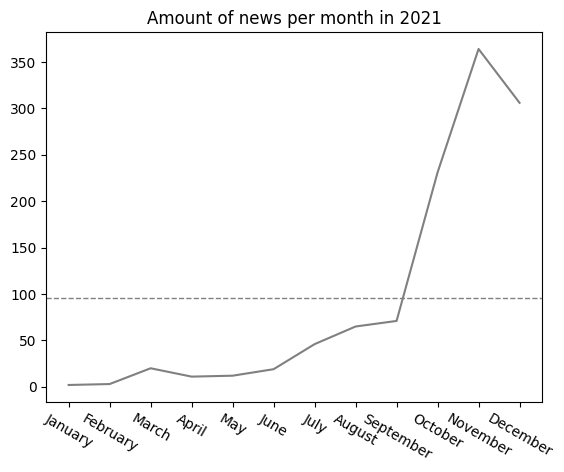

In [45]:
df_2021= df[(df['date'] >= '2021-01-01') & (df['date'] < '2022-01-01')]

months_names= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_d = df_2021.value_counts('month').sort_index()
plt.plot(months_names,monthly_d, color='grey')
plt.axhline(y=np.nanmean(monthly_d), color='grey', linestyle='--', linewidth=1, label='average')

plt.title('Amount of news per month in 2021')
plt.xticks(rotation = -30)

plt.show()

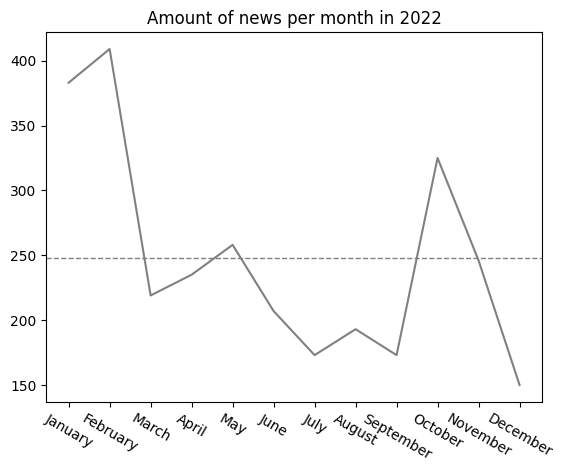

In [46]:
df_2022= df[(df['date'] >= '2022-01-01') & (df['date'] < '2023-01-01')]
monthly_d22 = df_2022.value_counts('month').sort_index()
plt.plot(months_names,monthly_d22, color='grey')
plt.axhline(y=np.nanmean(monthly_d22), color='grey', linestyle='--', linewidth=1, label='average')

plt.title('Amount of news per month in 2022')
plt.xticks(rotation = -30)

plt.show()

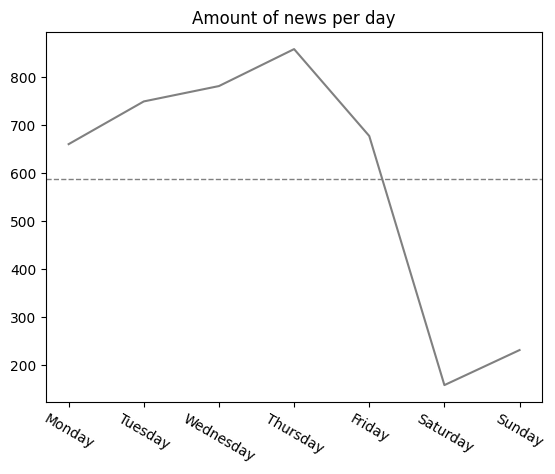

In [47]:
days_d = df.day.value_counts().sort_index()
days_names= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.plot(days_names,days_d, color='grey')
plt.title('Amount of news per day')
plt.xticks(rotation = -30)
plt.axhline(y=np.nanmean(days_d), color='grey', linestyle='--', linewidth=1, label='average')
plt.show()

Creating word cloud

In [48]:
# titles_list=df['title'].to_list()
# joined_titles= " ".join(titles_list)
# without_meta_t= list(filter(lambda w: w not in ['metaverse','meta'], joined_titles.split()))



In [49]:
def word_cloud(data):
    wordcloud = WordCloud(width = 600, height = 400, 
                      background_color ='white', 
                      min_font_size = 10, colormap='gist_rainbow').generate(data)
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [50]:
# df_title = " ".join(without_meta_t)
# word_cloud(df_title)


In [51]:
abstract_list=df['abstract_cleaning'].to_list()
joined_abstract= " ".join(abstract_list)
without_meta_a= list(filter(lambda w: w not in ['metaverse','meta'], joined_abstract.split()))



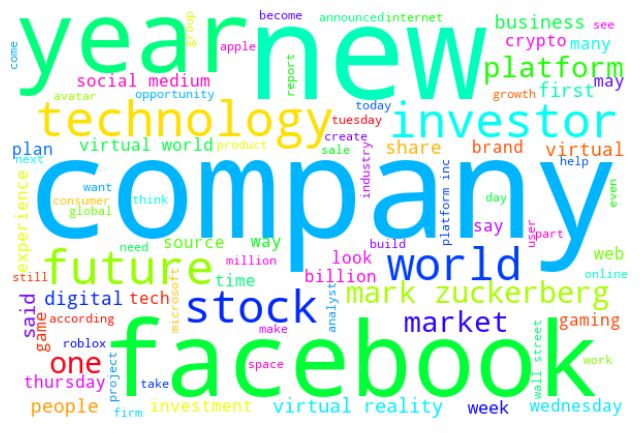

In [52]:
df_abstract =" ".join(without_meta_a)
word_cloud(df_abstract)


Plotting most frequent words from reviews using bar chart

In [53]:
def plot_top_words(data, how_many_words):
    sns.set(style='white')
    words_split= data.split()
    words_freq= FreqDist(words_split)

    words_df= pd.DataFrame({'word':list(words_freq.keys()),'count':list(words_freq.values())})

    top_words= words_df.nlargest(columns='count',n=how_many_words)
    top_words.sort_values('count',inplace=True)

    # Plotting 20 frequent words
    plt.figure(figsize=(10,5))
    ax = plt.barh(top_words['word'], width = top_words['count'],color='grey')
    plt.show()



In [54]:
# plot_top_words(df_title,20)

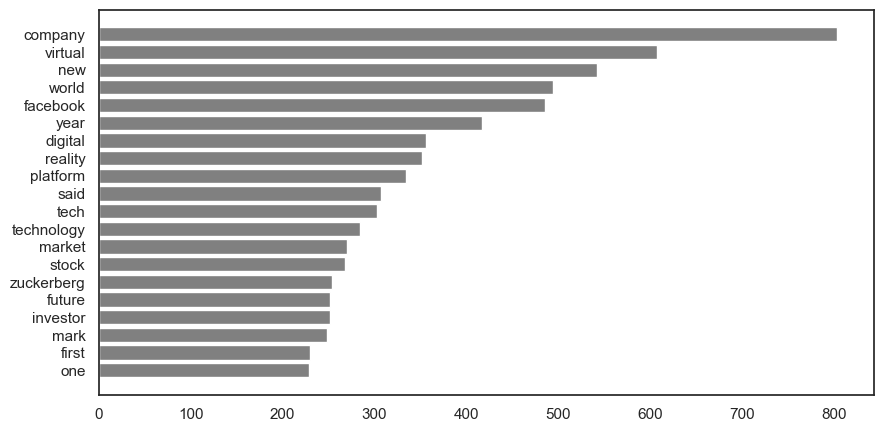

In [55]:
plot_top_words(df_abstract,20)

Sentiment classification using DistilRoBERTa model - emotions

In [71]:
classifier = pipeline("sentiment-analysis", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=False)


Some weights of RobertaModel were not initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [72]:
def sentiment_emotion(row):
    content= row
    sentiment=classifier(content)
    return sentiment[0]['label']

df['emotion'] = df.apply(lambda row: sentiment_emotion(row['abstract_cleaning']),axis=1)

In [ ]:
df

,newspaper,date,abstract,abstract_cleaning,tokenized,month,day,emotion
0,Mail Online,2022-12-31,the new year is likely to bring more challenges to the tech sector.,new year likely bring challenge tech sector,"[the, new, year, is, likely, to, bring, more, challenge, to, the, tech, sector]",12,6,neutral
1,Mail Online,2022-12-29,worldwide shipments of virtual and augmented reality headsets dropped 12 to 9.6 million this year a problem for meta and other tech companies that are invested in the digital worlds' potential.,worldwide shipment virtual augmented reality headset dropped million year problem meta tech company invested digital world potential,"[worldwide, shipment, of, virtual, and, augmented, reality, headset, dropped, to, million, this, year, a, problem, for, meta, and, other, tech, company, that, are, invested, in, the, digital, world, potential]",12,4,surprise
2,Mail Online,2022-12-29,"the year ahead brings new guard rails for crypto but not the blockchain technology that underpins it and other financial wizardry.""australia punches above",year ahead brings new guard rail crypto blockchain technology underpins financial wizardry australia punch,"[the, year, ahead, brings, new, guard, rail, for, crypto, but, not, the, blockchain, technology, that, underpins, it, and, other, financial, wizardry, australia, punch, above]",12,4,neutral
3,Mail Online,2022-12-29,the fortunes of silicon valley billionaires took a beating in 2022 as share prices of the world's tech giants plummeted.here are some of the worst hit by,fortune silicon valley billionaire took beating share price world tech giant plummeted worst hit,"[the, fortune, of, silicon, valley, billionaire, took, a, beating, in, a, share, price, of, the, world, s, tech, giant, plummeted, here, are, some, of, the, worst, hit, by]",12,4,sadness
4,Mail Online,2022-12-29,mailonline takes a look at the science behind why sticking on a virtual reality headset like oculus quest or htc vive can improve your workout.,take look science behind sticking virtual reality headset like oculus quest htc vive improve workout,"[mailonline, take, a, look, at, the, science, behind, why, sticking, on, a, virtual, reality, headset, like, oculus, quest, or, htc, vive, can, improve, your, workout]",12,4,neutral
...,...,...,...,...,...,...,...,...
4116,CNBC,2021-03-11,Gaming company Roblox went public Wednesday and ended its first trading session with an eyepopping $38 billion market cap.It's natural to wonder why a moneylosing company that makes video games for an audience of mostly children and teens attracted such a lofty valuation. Although its impressive,gaming company roblox went public wednesday ended first trading session billion market cap natural wonder company make video game audience mostly child teen attracted lofty valuation although impressive,"[gaming, company, roblox, went, public, wednesday, and, ended, it, first, trading, session, with, an, eyepopping, billion, market, cap, it, s, natural, to, wonder, why, a, moneylosing, company, that, make, video, game, for, an, audience, of, mostly, child, and, teen, attracted, such, a, lofty, valuation, although, it, impressive]",3,4,surprise
4117,CNBC,2021-03-10,Neil Rimer recalls having early conversations about what became Roblox when he was studying at Stanford in the 1980s. He was college buddies with David Baszucki the gaming company's founder and CEO.More than three decades later that idea has made Baszucki extremely rich his Roblox stake is worth,recall early conversation became roblox studying stanford college buddy gaming company founder three decade later idea made extremely rich roblox stake worth,"[neil, rimer, recall, having, early, conversation, about, what, became, roblox, when, he, wa, studying, at, stanford, in, the, s, he, wa, college, buddy, with, david, baszucki, the, gaming, company, s, founder, and, ceo, more, than, three, decade, later, that, idea, ha, made, baszucki, extremely, rich, his, roblox, stake, is, worth]",3,3,

[Text(0, 0, '1650'),
 Text(0, 0, '869'),
 Text(0, 0, '617'),
 Text(0, 0, '375'),
 Text(0, 0, '337'),
 Text(0, 0, '261'),
 Text(0, 0, '12')]

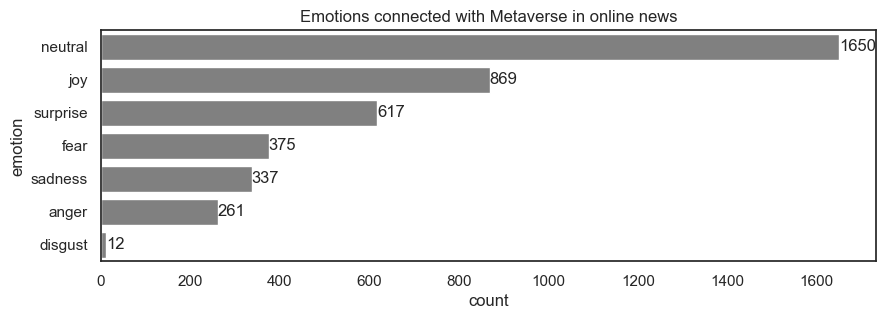

In [ ]:
plt.figure(figsize=(10,3))

p = sns.countplot(y='emotion',data=df,color='grey',order=df['emotion'].value_counts(ascending=False).index  )
abs_values = df['emotion'].value_counts(ascending=False).values
p.set_title('Emotions connected with Metaverse in online news')
p.bar_label(container=p.containers[0], labels=abs_values)

In [ ]:
df.groupby('emotion')['emotion'].count()

emotion
anger        261
disgust       12
fear         375
joy          869
neutral     1650
sadness      337
surprise     617
Name: emotion, dtype: int64

negative positive labelling using TextBlob

In [73]:
# function to calculate subjectivity
def getSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [74]:

df['polarity'] = df['abstract_cleaning'].apply(getPolarity) 
df['label'] = df['polarity'].apply(analysis)
df.head(20)

,newspaper,date,abstract,abstract_cleaning,tokenized,month,day,emotion,polarity,label
0,Mail Online,2022-12-31,the new year is likely to bring more challenges to the tech sector.,new year likely bring challenge tech sector,"[the, new, year, is, likely, to, bring, more, challenge, to, the, tech, sector]",12,6,neutral,0.068182,Positive
1,Mail Online,2022-12-29,worldwide shipments of virtual and augmented reality headsets dropped 12 to 9.6 million this year a problem for meta and other tech companies that are invested in the digital worlds' potential.,worldwide shipment virtual augmented reality headset dropped million year problem meta tech company invested digital world potential,"[worldwide, shipment, of, virtual, and, augmented, reality, headset, dropped, to, million, this, year, a, problem, for, meta, and, other, tech, company, that, are, invested, in, the, digital, world, potential]",12,4,surprise,0.000000,Neutral
2,Mail Online,2022-12-29,"the year ahead brings new guard rails for crypto but not the blockchain technology that underpins it and other financial wizardry.""australia punches above",year ahead brings new guard rail crypto blockchain technology underpins financial wizardry australia punch,"[the, year, ahead, brings, new, guard, rail, for, crypto, but, not, the, blockchain, technology, that, underpins, it, and, other, financial, wizardry, australia, punch, above]",12,4,neutral,0.068182,Positive
3,Mail Online,2022-12-29,the fortunes of silicon valley billionaires took a beating in 2022 as share prices of the world's tech giants plummeted.here are some of the worst hit by,fortune silicon valley billionaire took beating share price world tech giant plummeted worst hit,"[the, fortune, of, silicon, valley, billionaire, took, a, beating, in, a, share, price, of, the, world, s, tech, giant, plummeted, here, are, some, of, the, worst, hit, by]",12,4,sadness,-0.500000,Negative
4,Mail Online,2022-12-29,mailonline takes a look at the science behind why sticking on a virtual reality headset like oculus quest or htc vive can improve your workout.,take look science behind sticking virtual reality headset like oculus quest htc vive improve workout,"[mailonline, take, a, look, at, the, science, behind, why, sticking, on, a, virtual, reality, headset, like, oculus, quest, or, htc, vive, can, improve, your, workout]",12,4,neutral,-0.400000,Negative
5,Mail Online,2022-12-23,2022 has been a turbulent year in the tech sector.,turbulent year tech sector,"[ha, been, a, turbulent, year, in, the, tech, sector]",12,5,fear,0.000000,Neutral
6,Mail Online,2022-12-20,meta platforms inc boss mark zuckerberg defended his acquisition of a virtual reality fitness app to an,meta platform inc mark zuckerberg defended acquisition virtual reality fitness app,"[meta, platform, inc, bos, mark, zuckerberg, defended, his, acquisition, of, a, virtual, reality, fitness, app, to, an]",12,2,neutral,0.000000,Neutral
7,Mail Online,2022-12-20,meta is still making a push into building the metaverse committing to devote 20 of its costs to the effort at reality labs despite its stock price dropping 60 and a top executive departing.,meta still making push building metaverse committing devote cost effort reality lab despite stock price dropping top executive departing,"[meta, is, still, making, a, push, into, building, the, metaverse, committing, to, devote, of, it, cost, to, the, effort, at, reality, lab, despite, it, stock, price, dropping, and, a, top, executive, departing]",12,2,neutral,0.500000,Positive
8,Mail Online,2022-12-19,"""call of duty"" maker activision blizzard's chief operating officer daniel alegre will join ""bored ape"" nft maker yuga labs as its chief",call duty maker activision blizzard chief operating officer join bored ape nft maker lab chief,"[call, of, duty, maker, activision, blizzard, s, chief, operating, officer, daniel, alegre, will, join, bored, ape, nft, maker, yuga, lab, a, it, chief]",12,1,sadness,-0.500000,Negative
9,Mail Online,2022-

In [75]:
df.groupby('label')['label'].count()

label
Negative     853
Neutral     1312
Positive    1956
Name: label, dtype: int64

[Text(0, 0, '1956'), Text(0, 0, '1312'), Text(0, 0, '853')]

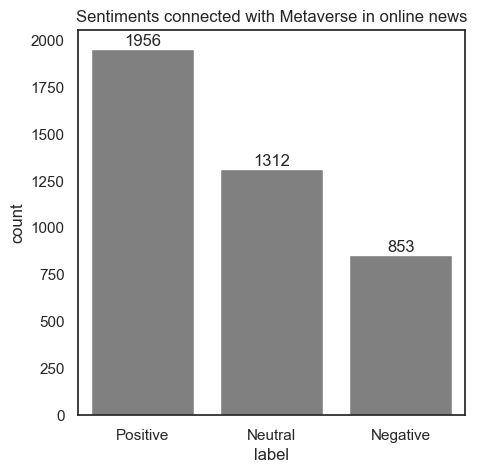

In [ ]:
plt.figure(figsize=(5,5))

p = sns.countplot(x='label',data=df,color='grey',order=df['label'].value_counts(ascending=False).index  )
abs_values = df['label'].value_counts(ascending=False).values
p.set_title('Sentiments connected with Metaverse in online news')
p.bar_label(container=p.containers[0], labels=abs_values)

Saving dataframe as csv for further uses

In [76]:
df.to_csv("sentiment_back.csv",encoding="utf-8-sig", sep=';',index=False)

Visualization of results 

In [77]:
df_senti = pd.read_csv('sentiment_back.csv', sep=';', encoding='utf-8')
df_senti.head(10)

,newspaper,date,abstract,abstract_cleaning,tokenized,month,day,emotion,polarity,label
0,Mail Online,2022-12-31,the new year is likely to bring more challenges to the tech sector.,new year likely bring challenge tech sector,"['the', 'new', 'year', 'is', 'likely', 'to', 'bring', 'more', 'challenge', 'to', 'the', 'tech', 'sector']",12,6,neutral,0.068182,Positive
1,Mail Online,2022-12-29,worldwide shipments of virtual and augmented reality headsets dropped 12 to 9.6 million this year a problem for meta and other tech companies that are invested in the digital worlds' potential.,worldwide shipment virtual augmented reality headset dropped million year problem meta tech company invested digital world potential,"['worldwide', 'shipment', 'of', 'virtual', 'and', 'augmented', 'reality', 'headset', 'dropped', 'to', 'million', 'this', 'year', 'a', 'problem', 'for', 'meta', 'and', 'other', 'tech', 'company', 'that', 'are', 'invested', 'in', 'the', 'digital', 'world', 'potential']",12,4,surprise,0.000000,Neutral
2,Mail Online,2022-12-29,"the year ahead brings new guard rails for crypto but not the blockchain technology that underpins it and other financial wizardry.""australia punches above",year ahead brings new guard rail crypto blockchain technology underpins financial wizardry australia punch,"['the', 'year', 'ahead', 'brings', 'new', 'guard', 'rail', 'for', 'crypto', 'but', 'not', 'the', 'blockchain', 'technology', 'that', 'underpins', 'it', 'and', 'other', 'financial', 'wizardry', 'australia', 'punch', 'above']",12,4,neutral,0.068182,Positive
3,Mail Online,2022-12-29,the fortunes of silicon valley billionaires took a beating in 2022 as share prices of the world's tech giants plummeted.here are some of the worst hit by,fortune silicon valley billionaire took beating share price world tech giant plummeted worst hit,"['the', 'fortune', 'of', 'silicon', 'valley', 'billionaire', 'took', 'a', 'beating', 'in', 'a', 'share', 'price', 'of', 'the', 'world', 's', 'tech', 'giant', 'plummeted', 'here', 'are', 'some', 'of', 'the', 'worst', 'hit', 'by']",12,4,sadness,-0.500000,Negative
4,Mail Online,2022-12-29,mailonline takes a look at the science behind why sticking on a virtual reality headset like oculus quest or htc vive can improve your workout.,take look science behind sticking virtual reality headset like oculus quest htc vive improve workout,"['mailonline', 'take', 'a', 'look', 'at', 'the', 'science', 'behind', 'why', 'sticking', 'on', 'a', 'virtual', 'reality', 'headset', 'like', 'oculus', 'quest', 'or', 'htc', 'vive', 'can', 'improve', 'your', 'workout']",12,4,neutral,-0.400000,Negative
5,Mail Online,2022-12-23,2022 has been a turbulent year in the tech sector.,turbulent year tech sector,"['ha', 'been', 'a', 'turbulent', 'year', 'in', 'the', 'tech', 'sector']",12,5,fear,0.000000,Neutral
6,Mail Online,2022-12-20,meta platforms inc boss mark zuckerberg defended his acquisition of a virtual reality fitness app to an,meta platform inc mark zuckerberg defended acquisition virtual reality fitness app,"['meta', 'platform', 'inc', 'bos', 'mark', 'zuckerberg', 'defended', 'his', 'acquisition', 'of', 'a', 'virtual', 'reality', 'fitness', 'app', 'to', 'an']",12,2,neutral,0.000000,Neutral
7,Mail Online,2022-12-20,meta is still making a push into building the metaverse committing to devote 20 of its costs to the effort at reality labs despite its stock price dropping 60 and a top executive departing.,meta still making push building metaverse committing devote cost effort reality lab despite stock price dropping top executive departing,"['meta', 'is', 'still', 'making', 'a', 'push', 'into', 'building', 'the', 'metaverse', 'committing', 'to', 'devote', 'of', 'it', 'cost', 'to', 'the', 'effort', 'at', 'reality', 'lab', 'despite', 'it', 'stock', 'price', 'dropping', 'and', 'a', 'top', 'executive', 'departing']",12,2,neutral,0.500000,Positive
8,Mail Online,2022-12-19,"""call of duty"" maker activision blizzard's chief operating officer daniel alegre will 

In [59]:
df_senti.groupby('emotion')['emotion'].count()

emotion
anger        261
disgust       12
fear         375
joy          869
neutral     1650
sadness      337
surprise     617
Name: emotion, dtype: int64

In [78]:
df_senti.loc[df_senti['emotion']=='surprise']

,newspaper,date,abstract,abstract_cleaning,tokenized,month,day,emotion,polarity,label
1,Mail Online,2022-12-29,worldwide shipments of virtual and augmented reality headsets dropped 12 to 9.6 million this year a problem for meta and other tech companies that are invested in the digital worlds' potential.,worldwide shipment virtual augmented reality headset dropped million year problem meta tech company invested digital world potential,"['worldwide', 'shipment', 'of', 'virtual', 'and', 'augmented', 'reality', 'headset', 'dropped', 'to', 'million', 'this', 'year', 'a', 'problem', 'for', 'meta', 'and', 'other', 'tech', 'company', 'that', 'are', 'invested', 'in', 'the', 'digital', 'world', 'potential']",12,4,surprise,0.000000,Neutral
11,Mail Online,2022-12-15,ces the annual tech industry event formerly known as the consumer electronics show is returning to las vegas this week with the hope that,annual tech industry event formerly known consumer electronics show returning la week hope,"['ce', 'the', 'annual', 'tech', 'industry', 'event', 'formerly', 'known', 'a', 'the', 'consumer', 'electronics', 'show', 'is', 'returning', 'to', 'la', 'vega', 'this', 'week', 'with', 'the', 'hope', 'that']",12,4,surprise,0.000000,Neutral
15,Mail Online,2022-12-06,tony fadell a wellknown silicon valley executive known as the father of the ipod on tuesday unveiled his,tony silicon valley executive known father ipod tuesday unveiled,"['tony', 'fadell', 'a', 'wellknown', 'silicon', 'valley', 'executive', 'known', 'a', 'the', 'father', 'of', 'the', 'ipod', 'on', 'tuesday', 'unveiled', 'his']",12,2,surprise,0.000000,Neutral
17,Mail Online,2022-12-05,valentino designer pierpaolo piccioli and model bella hadid were among the winners at the fashion awards in london on,valentino designer model hadid among winner fashion award london,"['valentino', 'designer', 'pierpaolo', 'piccioli', 'and', 'model', 'bella', 'hadid', 'were', 'among', 'the', 'winner', 'at', 'the', 'fashion', 'award', 'in', 'london', 'on']",12,1,surprise,0.000000,Neutral
22,Mail Online,2022-11-22,rumors swirled on tuesday that mark zuckerberg is planning to resign as ceo of meta the company he has built from the ground up but company officials say the reports are not true.,swirled tuesday mark zuckerberg planning resign meta company built ground company official say report true,"['rumor', 'swirled', 'on', 'tuesday', 'that', 'mark', 'zuckerberg', 'is', 'planning', 'to', 'resign', 'a', 'ceo', 'of', 'meta', 'the', 'company', 'he', 'ha', 'built', 'from', 'the', 'ground', 'up', 'but', 'company', 'official', 'say', 'the', 'report', 'are', 'not', 'true']",11,2,surprise,0.350000,Positive
...,...,...,...,...,...,...,...,...,...,...
4106,CNBC,2021-04-29,Wall Street can't get enough of Apple's blowout quarter.The iPhone giant reported a 54 increase in sales and authorized a $90 billion share buyback in its fiscal secondquarter earnings report though did not issue official guidance for the upcoming quarter.Market analysts were nevertheless impress,wall street get enough apple blowout quarter iphone giant reported increase sale authorized billion share buyback fiscal earnings report though issue official guidance upcoming quarter market analyst nevertheless impress,"['wall', 'street', 'can', 'not', 'get', 'enough', 'of', 'apple', 's', 'blowout', 'quarter', 'the', 'iphone', 'giant', 'reported', 'a', 'increase', 'in', 'sale', 'and', 'authorized', 'a', 'billion', 'share', 'buyback', 'in', 'it', 'fiscal', 'secondquarter', 'earnings', 'report', 'though', 'did', 'not', 'issue', 'official', 'guidance', 'for', 'the', 'upcoming', 'quarter', 'market', 'analyst', 'were', 'nevertheless', 'impress']",4,4,surprise,0.000000,Neutral
4111,CNBC,2021-03-17,Contemporary artist Krista Kim recently sold an NFTminted digital house for 288 ether valued at over $500000 based on the cryptocurrency's trading price Wednesday.The creation called Mars House is part of Kim's grand vision for the role augmented reality will play in the wor

In [61]:
df_senti.groupby('newspaper')['newspaper'].count()

newspaper
Bloomberg          1042
CNBC                798
Financial Times     528
Forbes              898
Mail Online         593
The Times           262
Name: newspaper, dtype: int64

Plot showing the number of articles with a given sentiment considering each online news source

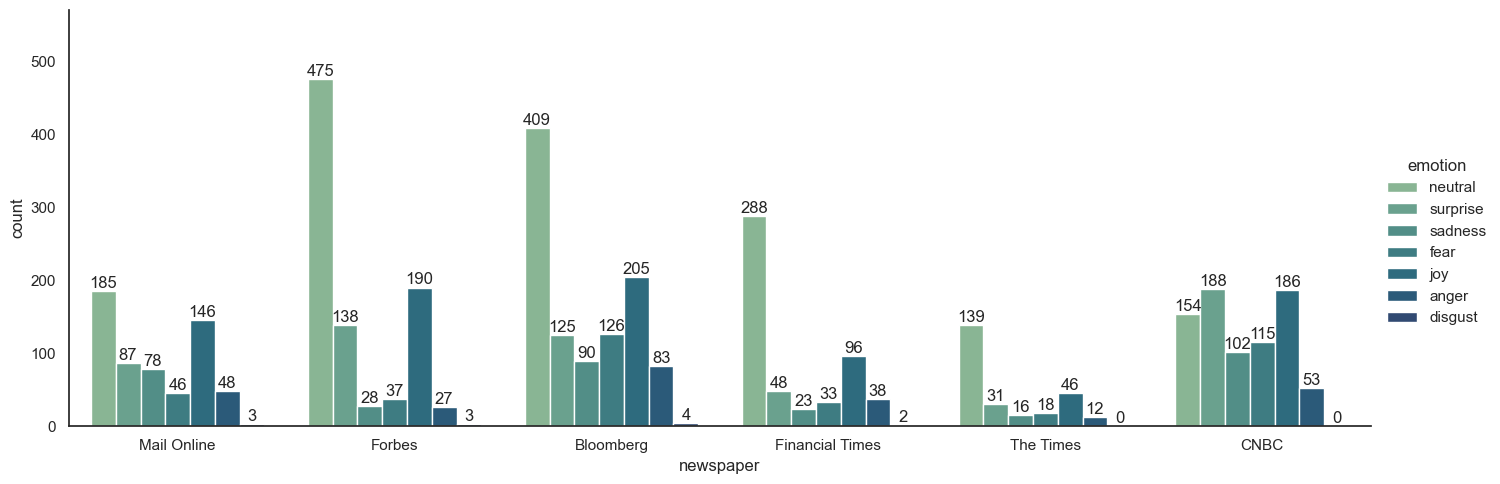

In [62]:

p = sns.catplot(x='newspaper',hue='emotion',data=df_senti,kind='count',aspect=2.8, palette='crest')

for a_x in p.axes.ravel():
    
    # add numbers
    for num in a_x.containers:
        a_x.bar_label(num, label_type='edge')
    a_x.margins(y=0.2)

Graph showing the number of articles with a given emotion sentiment for each label neutral, positive, negative

In [63]:
df_senti.groupby(['emotion','label'])['emotion'].count()

emotion   label   
anger     Negative     76
          Neutral      93
          Positive     92
disgust   Negative      6
          Neutral       1
          Positive      5
fear      Negative     94
          Neutral     119
          Positive    162
joy       Negative    167
          Neutral     202
          Positive    500
neutral   Negative    224
          Neutral     682
          Positive    744
sadness   Negative    155
          Neutral      77
          Positive    105
surprise  Negative    131
          Neutral     138
          Positive    348
Name: emotion, dtype: int64

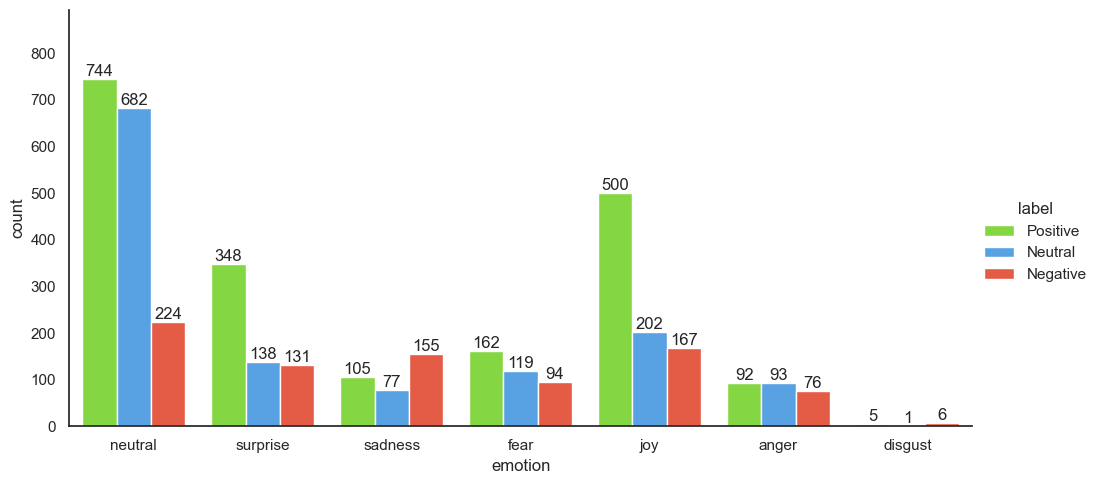

In [64]:

palette = ["#81EF29","#41A4FA","#FF492C"]
p = sns.catplot(x='emotion',hue='label',data=df_senti,kind='count',aspect=2, palette=palette)

for a_x in p.axes.ravel():
    
    # add numbers
    for num in a_x.containers:
        a_x.bar_label(num, label_type='edge')
    a_x.margins(y=0.2)

In [ ]:

df_senti[['abstract','polarity','label','newspaper']].sort_values(by='polarity',ascending=True).head(5)

,abstract,polarity,label,newspaper
2416,There are tools to avoid the worst outcomes if only wed use them.,-1.0,Negative,Bloomberg
1496,Tencent Holdings Ltd. and Sea Ltd. are signaling that the $200 billion gaming industry which in 2022 endured one of its worst slumps on record is in for an even rockier year.,-1.0,Negative,Bloomberg
2921,it may lack a snazzy metaverse or demigod founder to grab headlines. but sometimes boring deserves a punt.,-1.0,Negative,Financial Times
1702,As the campaigns of Blake Masters and JD Vance struggle the party finds itself in a standoff with one of Silicon Valleys most ruthless investors.,-1.0,Negative,Bloomberg
571,hong kong stocks headed for their worst day in almost three weeks on thursday as tech shares tumbled on china's tightening,-1.0,Negative,Mail Online


In [ ]:
df_senti[['abstract','polarity','label','newspaper']].sort_values(by='polarity',ascending=False).head(10)


,abstract,polarity,label,newspaper
1220,the metaverse provides the perfect opportunity to reimagine the conference experience for 2022 and beyond.,1.0,Positive,Forbes
2751,in some ways therefore the elusive metaverse is a perfect partner.,1.0,Positive,Financial Times
1494,Gut wrenching cutbacks will refocus the tech industry on things that go bleepbleep. Plus a selection of the columnists best work in 2022.,1.0,Positive,Bloomberg
3085,its heels. so what is narayen doing to turn the tide?his answer conquer the metaverse .yes adobe a company perhaps best known as the creator of the staid trusty,1.0,Positive,The Times
666,one of the best ways to familiarize yourself with the metaverse is to experience what it has to offer firsthand.,1.0,Positive,Forbes
3926,Jim Cramer answers CNBC Investing Club member questions about the best places to put their money in the market. Cramer discusses longterm investing the metaverse and more.,1.0,Positive,CNBC
3268,it is best known for its blackjack tables slot,1.0,Positive,The Times
3848,"Here are the biggest calls on Wall Street on MondayGoldman Sachs adds SolarEdge to the conviction buy listGoldman added SolarEdge to its conviction buy list and said it sees upside to consensus for the solar company.""Best positioned for upside to consensus estimates on battery storage ramp and impr",1.0,Positive,CNBC
2659,best rutherford member dcms panel on business and the metaverse find me on strava kom sydenham hill pr london to brighton 3h 59m whatsapp to sally hi sal i know its tricky for sponsors but no one,1.0,Positive,Financial Times
2586,btw keen to get your thoughts on the metaverse . lets get a date in the diary. best rutherford member dcms panel on business and the metaverse find me on strava kom sydenham hill.,1.0,Positive,Financial Times
